<a href="https://colab.research.google.com/github/BishtNikitaaa/MovieMaven--A_Recommendation_Sytem/blob/main/Assingment_Nikita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00


In [2]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="85quezZqUHaHNgeoLpH4")
project = rf.workspace("sana-ali").project("gloves-annotated-dataset")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gloves-Annotated-Dataset-1 in yolov8:: 100%|██████████| 4896/4896 [00:01<00:00, 4726.83it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO
import json, os, datetime

#Training the data
model = YOLO("yolov8n.pt")  #here we hve used nano version of Yolo for speed
model.train(data=f"{dataset.location}/data.yaml", epochs=30, imgsz=640)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Gloves-Annotated-Dataset-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbf41810a40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [7]:
metrics = model.val()
print(metrics)
#Output metrics

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 590.3±296.1 MB/s, size: 12.9 KB)
val: Scanning /content/Gloves-Annotated-Dataset-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 408.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.3it/s 3.9s
                   all        200        410      0.991       0.95       0.97      0.792
                gloved        200        307      0.989      0.997      0.995       0.81
            not-gloved         94        103      0.993      0.903      0.946      0.774
Speed: 3.1ms preprocess, 5.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralyt

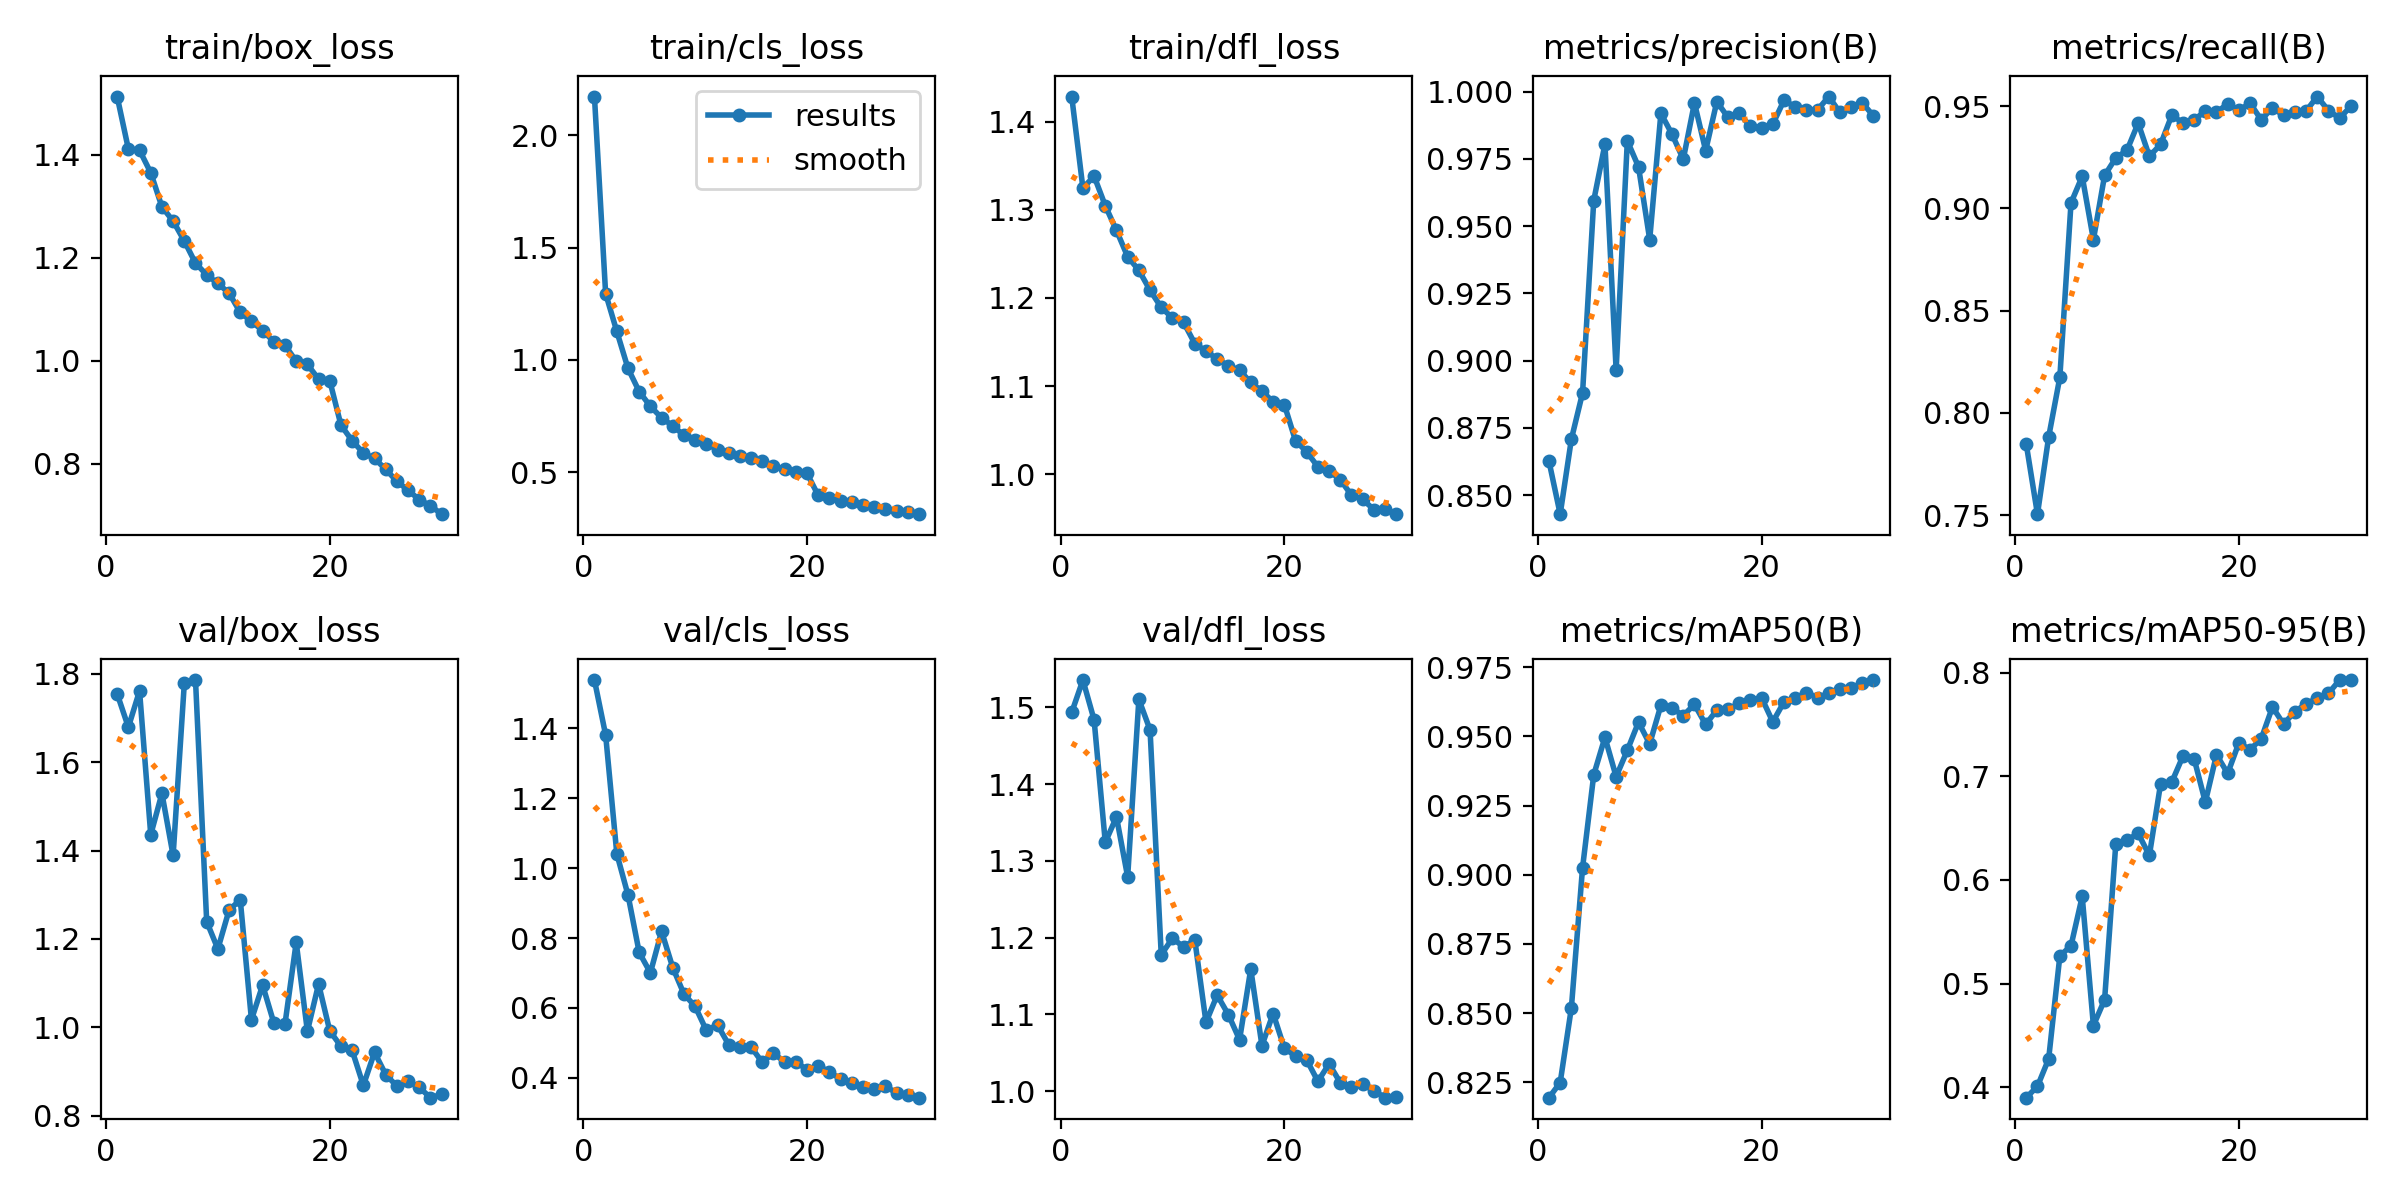

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/train/results.png', width=600)


In [5]:
#Inference on few sample images
os.makedirs("outputs", exist_ok=True)
os.makedirs("logs", exist_ok=True)

image_folder = dataset.location + "/valid/images"
results = model.predict(source=image_folder, save=True, project="outputs", name="run_1")


image 1/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-003_jpg.rf.493b4121a50b93de630aa1471f5ddedc.jpg: 640x640 2 gloveds, 8.6ms
image 2/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-005_jpg.rf.cfb8dceb7d07ce45c3d79da059aa2509.jpg: 640x640 2 gloveds, 7.3ms
image 3/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-026_jpg.rf.8dfe7a55604e89f7628400d92dd426b4.jpg: 640x640 2 gloveds, 7.3ms
image 4/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-030_jpg.rf.b39b6a4192decddac74b5603fe19fd09.jpg: 640x640 2 gloveds, 7.3ms
image 5/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-031_jpg.rf.3ca28f847b1bcd77750fb154be25b4a8.jpg: 640x640 2 gloveds, 7.3ms
image 6/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-039_jpg.rf.9fb657d58944377adf377f26603a9ac6.jpg: 640x640 2 gloveds, 7.2ms
image 7/200 /content/Gloves-Annotated-Dataset-1/valid/images/20220118_125419-040_jpg.rf.6f405

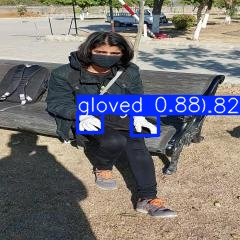

In [10]:
from IPython.display import Image
Image(filename='runs/detect/predict/20220118_125419-003_jpg.rf.493b4121a50b93de630aa1471f5ddedc.jpg', width=600)


In [12]:
#Log results
log = []
for r in results:
    dets = []
    for box in r.boxes:
        dets.append({
            "class": model.names[int(box.cls)],
            "confidence": float(box.conf),
            "box_xywh": box.xywh[0].tolist()
        })
    log.append({
        "timestamp": str(datetime.datetime.now()),
        "image": os.path.basename(r.path),
        "detections": dets
    })

with open("logs/run_1.json", "w") as f:
    json.dump(log, f, indent=2)

# Gloved vs Bare Hand Detection using YOLOv8

## 📘 Dataset Name and Source
**Dataset Name:** Gloved vs Non-Gloved Hand Dataset  
**Source:** Custom dataset prepared and annotated using **Roboflow**.  
Images include hands with and without gloves captured under different lighting and background conditions.  
Classes used:  
- `gloved`  
- `not-gloved`

---

## ⚙️ Model Used
The model used is **YOLOv8n (Ultralytics)** — a lightweight and efficient object detection model.  
It was chosen for its speed and accuracy, suitable for real-time applications such as factory or lab safety monitoring.

**Training configuration:**
- Epochs: 30  
- Image size: 640×640  
- Batch size: 16  
- Optimizer: Adam (default in YOLOv8)  
- Hardware: Google Colab (Tesla T4 GPU)  

---

## 🧩 Preprocessing and Training Done
1. **Data Preparation**
   - Images were resized to 640×640.
   - Annotations were stored in YOLO format (`.txt` files with bounding boxes and class IDs).
   - Dataset split: 80% training and 20% validation.

2. **Training Command**
   ```bash
   yolo detect train data=data.yaml model=yolov8n.pt epochs=30 imgsz=640


✅ **What Worked**

The YOLOv8n model achieved high accuracy and precision even on a small dataset.

Precision: 0.991, Recall: 0.950, mAP@0.5: 0.97, mAP@0.5–0.95: 0.79.

The model was capable of real-time detection (~130 FPS).

Clear distinction between gloved and bare hands in most scenarios.

⚠️ **What Didn’t Work**

Class imbalance led to slightly lower recall for the not-gloved class.

Performance decreased under poor lighting or motion blur.

Skin-colored gloves sometimes confused the model with bare hands.

▶️ **How to Run Your Script**

Install Ultralytics

pip install ultralytics


Organize Dataset

dataset/
 ├── images/
 │   ├── train/
 │   └── val/
 └── labels/
     ├── train/
     └── val/


Train the Model

yolo detect train data=data.yaml model=yolov8n.pt epochs=30 imgsz=640


Validate the Model

yolo val model=runs/detect/train/weights/best.pt data=data.yaml


Run Detection on Test Images

yolo detect predict model=runs/detect/train/weights/best.pt source=path/to/test/images


# **Part 2: Reasoning-Based Questions (Write-up)**

- Q1: Choosing the Right Approach

I would use object detection because we need to check if the label is present or missing on the product. Detection helps in identifying both the location and presence of the label in the image.
If detection doesn’t work well (for example, if labels are very small or hard to detect), I would try image classification on cropped product images — one class for “with label” and another for “without label.”
As a backup, I could also test segmentation if the label area needs to be identified more precisely on the product surface.

- Q2: Debugging a Poorly Performing Model

If my model performs poorly on new factory images, I would first check the following things:

Data quality – Are new images similar to the training ones (lighting, angle, camera type)?

Overfitting – Check if training accuracy is high but validation accuracy is low.

Class balance – See if one class has more images than the other.

Augmentations – Maybe add brightness or rotation changes to make the model more robust.

Visual check – Look at a few wrong predictions to see what the model is confusing.

Annotation check – Make sure bounding boxes or labels are correctly drawn.

I’d probably visualize a few images with predictions vs ground truth to understand where it’s failing.

- Q3: Accuracy vs Real Risk

No, accuracy is not the right metric here. Even though 98% accuracy looks good, missing 1 out of 10 defective products is a big problem on a factory line.
Instead, I would focus on recall (especially for defective products) because we want to catch every defective item, even if that means a few false alarms.
So, I’d rather have higher recall and slightly lower precision than miss defective items.

- Q4: Annotation Edge Cases

Blurry or partially visible objects should be handled carefully.
If they are common in real-life factory images, I would keep them in the dataset because the model needs to learn to handle such cases.
But if they are rare or too unclear to label properly, I might remove them so they don’t confuse the model.
The trade-off is between realism (keeping all situations) and data quality (keeping only clear examples).